## Introdution of Project
> In this project I will use lending data of Lending Club(the company connect people who need money with people who have money) from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.
## Summary of Project
>I built a Decision Tree model with an accuracy of 73% and a Random Forest model with an accuracy of 85%, using numerical factors and transforming the categorical 'purpose' variable into multiple binary (boolean) features. Both models aimed to predict whether a borrower would fully repay their loan. However, both models suffer from class imbalance, where they predict well for the majority class (fully paid loans, class 0) but underperform on the minority class (not fully paid loans, class 1). To improve the prediction for class 1, techniques like SMOTE (Synthetic Minority Over-sampling Technique) or adjusting the class weights during model training could be applied to balance the dataset and enhance model performance for the minority class.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [12]:
loans = pd.read_csv('loan_data.csv')

In [14]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [16]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [18]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## EDA

Text(0.5, 0, 'Fico')

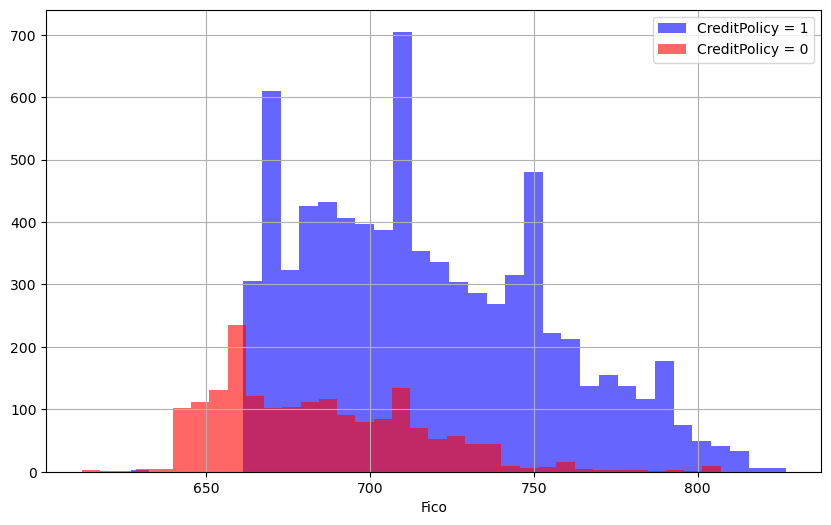

In [21]:
plt.figure(figsize = (10,6))
loans[loans['credit.policy'] == 1]['fico'].hist(bins = 35,color = 'blue',label = 'CreditPolicy = 1',alpha = 0.6)
loans[loans['credit.policy'] == 0]['fico'].hist(bins = 35,color = 'red',label = 'CreditPolicy = 0',alpha = 0.6)
plt.legend()
plt.xlabel('Fico')

<b> Insight of 1st Graph</b>
> In the user sample, there were more individuals who met the credit underwriting criteria than those who did not. A clear pattern emerged showing that the lower the FICO credit score, the more likely borrowers were to fall short of the criteria. Specifically, users with FICO scores around 660 tended to be concentrated among those who did not meet the underwriting standards.


Text(0.5, 0, 'Fico')

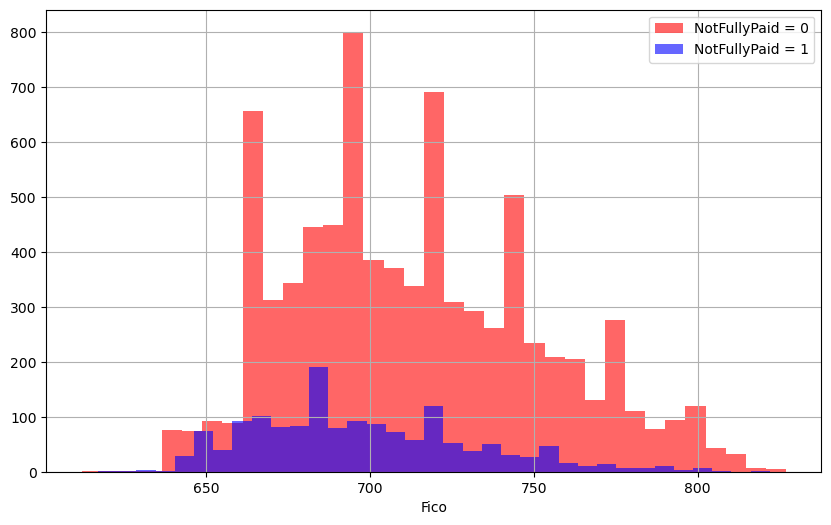

In [24]:
plt.figure(figsize = (10,6))
loans[loans['not.fully.paid'] == 0]['fico'].hist(bins = 35,color = 'red',label = 'NotFullyPaid = 0',alpha = 0.6)
loans[loans['not.fully.paid'] == 1]['fico'].hist(bins = 35,color = 'blue',label = 'NotFullyPaid = 1',alpha = 0.6)
plt.legend()
plt.xlabel('Fico')

<b> Insight of 2nd Graph</b>
> In comparison to fully paid users, the number of not fully paid users is significantly smaller. However, both groups share a more or less similar distribution pattern, suggesting that despite the difference in payment status, their profiles are distributed similarly. This pattern may resemble the distribution of FICO credit scores, which could be attributed to how FICO scores are calculated, resulting in higher concentrations of users around specific score ranges.

<Axes: xlabel='purpose', ylabel='count'>

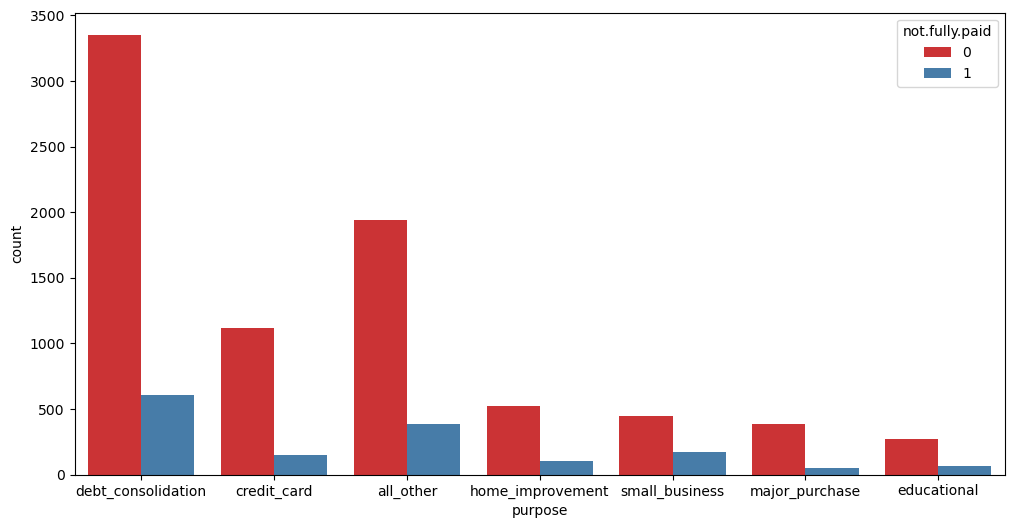

In [36]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'purpose', hue = 'not.fully.paid',data = loans , palette = 'Set1')

<b> Insight of 3rd Graph</b>
> Debt consolidation stands out as the most common reason for seeking a loan, followed by credit card repayment and other miscellaneous reasons. In comparison, reasons like home improvement, small business, major purchases, and education rank much lower. An important observation is that the ratio of not fully paid to fully paid loans remains fairly consistent across all reasons for borrowing.

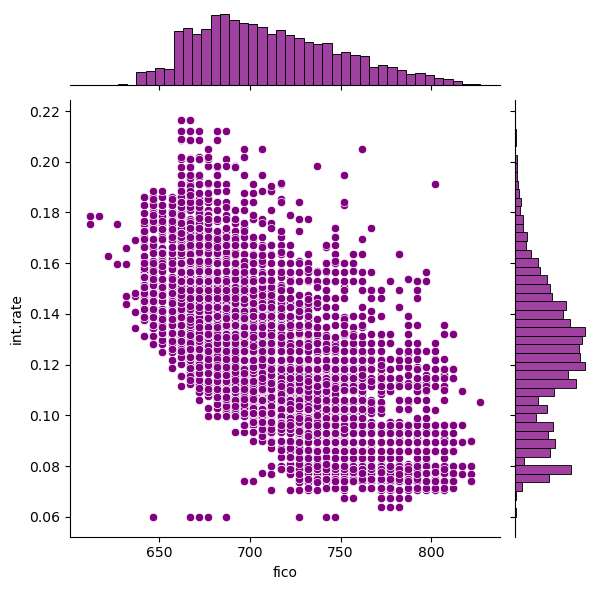

In [42]:
sns.jointplot(x = 'fico',y ='int.rate',data = loans,color = 'purple')

<b> Insight of 4th Graph</b>
> As your FICO score increases, it indicates better creditworthiness, which typically leads to lower interest rates on loans. Conversely, as your FICO score decreases, it signals poorer credit, and lenders compensate for this increased risk by raising interest rates. In other words, a higher FICO score not only reflects your financial reliability but also allows you to secure loans at more favorable terms, whereas a lower score results in higher borrowing costs due to the increased likelihood of default.

<Figure size 1200x600 with 0 Axes>

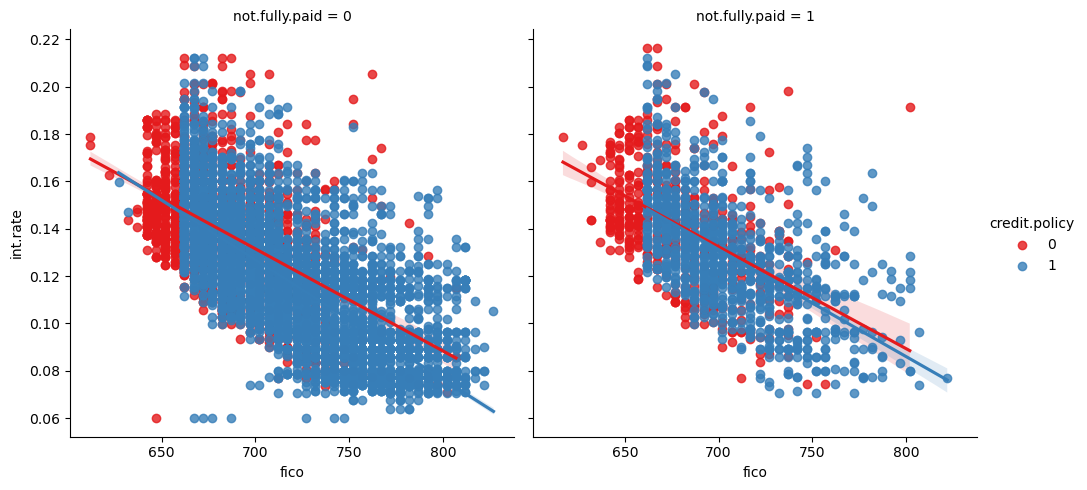

In [44]:
plt.figure(figsize = (12,6))
sns.lmplot(x = 'fico',y ='int.rate',data = loans, hue = 'credit.policy',col = 'not.fully.paid',palette = 'Set1')

<b> Insight of 5th Graph</b>
> The behavior remains consistent regardless of whether the loan was fully paid off or not, and whether the borrower was denied under the credit policy. This indicates that payment patterns and the application of the credit policy don't drastically alter the overall distribution of borrower behavior. Both fully paid and not fully paid borrowers show similar trends, reflecting how credit approval processes and payment outcomes don't significantly deviate in terms of borrower characteristics or behavior across different segments.

In [48]:
cat_feats = ['purpose']

In [50]:
final_data = pd.get_dummies(loans, columns = cat_feats, drop_first = True)

In [52]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [56]:
from sklearn.model_selection import train_test_split

In [60]:
X = final_data.drop('not.fully.paid',axis = 1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 101)

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
tree_pred = dtree.predict(X_test)

In [80]:
print(classification_report(y_test, tree_pred))
print(confusion_matrix(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874

[[1985  446]
 [ 339  104]]


<b>Insight</b>
>The overall accuracy is 0.73 which is not very good. The model handles class 0 quite well but performs poorly on class 1, as indicated by the low precision, recall, and F1-score. This may suggest the need for strategies like oversampling the minority class, using a different model, or adjusting class weights to improve the model’s ability to predict the minority class.

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfore = RandomForestClassifier(n_estimators = 300)
rfore.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [93]:
rfore_pred = rfore.predict(X_test)

In [97]:
print(classification_report(y_test, rfore_pred))
print(confusion_matrix(y_test, rfore_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.67      0.03      0.05       443

    accuracy                           0.85      2874
   macro avg       0.76      0.51      0.48      2874
weighted avg       0.82      0.85      0.78      2874

[[2425    6]
 [ 431   12]]


<b>Insight</b>
>The accuracy of RandomForest model is 0.85. It performs significantly better on class 0 but fails to capture class 1 well. DecisionTree, while not as accurate overall, does a slightly better job identifying class 1 instances.
>
>Both models suffer from class imbalance, where they perform well on class 0 but struggle with class 1. Adjusting for class imbalance (e.g., using SMOTE, adjusting class weights) could improve performance for class 1 in both models.